# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Importing the dataset

In [2]:
df = pd.read_excel("SMSSpamCollection.xlsx")
X = df['Content']
X = X.astype(str)
y = df['Label']

In [3]:
df.head()

,Content,Label
0,Ok lar... Joking wif u oni...,Not Spam
1,Free entry in 2 a wkly comp to win FA Cup fina...,Spam
2,U dun say so early hor... U c already then say...,Not Spam
3,"Nah I don't think he goes to usf, he lives aro...",Not Spam
4,FreeMsg Hey there darling it's been 3 week's n...,Spam


# Descriptive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  5573 non-null   object
 1   Label    5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df['Label'].value_counts()

Not Spam    4826
Spam         747
Name: Label, dtype: int64

In [6]:
print(df.isnull().sum())

Content    0
Label      0
dtype: int64


Text(0.5, 1.0, 'Email Type')

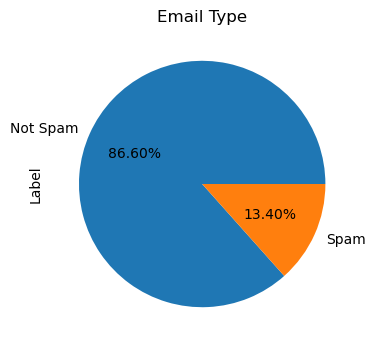

In [7]:
plt.figure(figsize = (4, 4))
df['Label'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')
plt.title("Email Type")

# Creating a TF-IDF matrix from the text data

In [8]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

In [9]:
X, y =  RandomUnderSampler().fit_resample(X, y)

In [10]:
y.value_counts()

Not Spam    747
Spam        747
Name: Label, dtype: int64

In [23]:
print(X.sum_duplicates())

None


# Splitting the data into train and test datsets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
y_train

1488        Spam
629     Not Spam
978         Spam
391     Not Spam
117     Not Spam
          ...   
1219        Spam
379     Not Spam
932         Spam
47      Not Spam
820         Spam
Name: Label, Length: 1195, dtype: object

In [14]:
#Convert the sparse matrix to a DataFrame
X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())

# Linear SVC

In [15]:
#LinearSVC
from sklearn.svm import SVC

#Creating a linearSVC classifier
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

#Making predictions on the test data
y_pred = svm_model.predict(X_test)

#Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Printing the results
print("Linear SVC Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Linear SVC Classifier Results:
Accuracy: 0.9364548494983278
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.90      0.97      0.94       145
        Spam       0.97      0.90      0.94       154

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



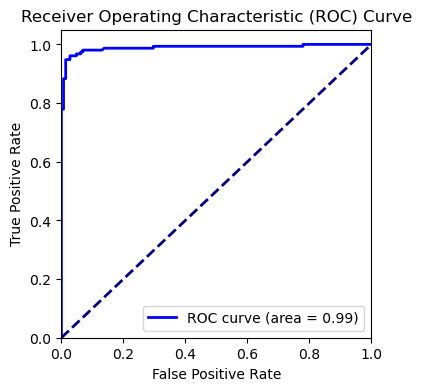

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_prob = svm_model.decision_function(X_test)

# Modify labels: 'Spam' as positive class and 'Not Spam' as negative class
y_test_binary = [1 if label == 'Spam' else 0 for label in y_test]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_binary, y_prob)

# Plot the ROC curve
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = svm_model.predict(user_input_dense)
print("This msg is:", prediction[0])


Enter the text to predict (e.g., an SMS message): Win an Iphone for free!! Claim it by clicking on this link now!
This msg is: Spam


# Random Forest Model

In [19]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Training the classifier on the balanced training data
random_forest_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = random_forest_classifier.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Random Forest Classifier Results:
Accuracy: 0.9464882943143813
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.91      0.99      0.95       145
        Spam       0.99      0.90      0.95       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



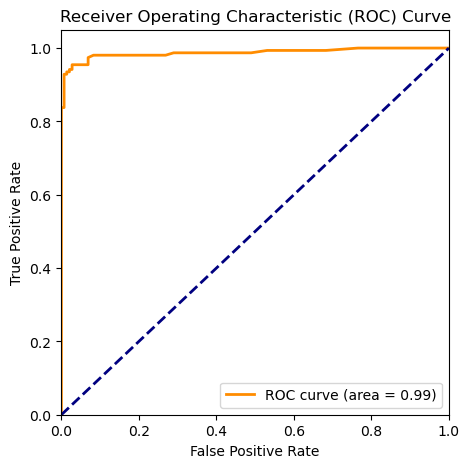

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the positive class ('Spam')
y_prob = random_forest_classifier.predict_proba(X_test)[:, 1]

# Modify labels: 'Spam' as the positive class and 'Not Spam' as the negative class
y_test_binary = [1 if label == 'Spam' else 0 for label in y_test]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_binary, y_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [21]:
#Prediction of user input using Random Forest
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = random_forest_classifier.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Win an Iphone for free!! Claim it by clicking on this link now!
This msg is: Spam


# Logistic Regression Model

In [22]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)

# Training the classifier on the balanced training data
logistic_regression_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logistic_regression_classifier.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Logistic Regression Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Logistic Regression Classifier Results:
Accuracy: 0.9364548494983278
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.89      0.99      0.94       145
        Spam       0.99      0.88      0.93       154

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



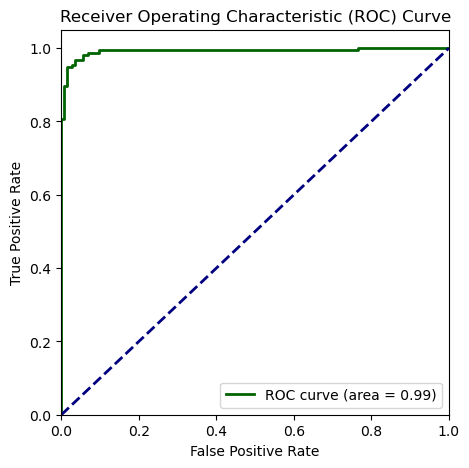

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the positive class ('Spam')
y_prob = logistic_regression_classifier.predict_proba(X_test)[:, 1]

# Modify labels: 'Spam' as the positive class and 'Not Spam' as the negative class
y_test_binary = [1 if label == 'Spam' else 0 for label in y_test]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_binary, y_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
#Prediction of user input using Logistic Regression
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = logistic_regression_classifier.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Win an Iphone for free!! Claim it by clicking on this link now!
This msg is: Spam


# Perceptron Model

In [25]:
#Perceptron Model
from sklearn.linear_model import Perceptron

# Creating a Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)
perceptron_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = perceptron_classifier.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Perceptron Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Perceptron Classifier Results:
Accuracy: 0.9163879598662207
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.86      0.99      0.92       145
        Spam       0.99      0.84      0.91       154

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.93      0.92      0.92       299



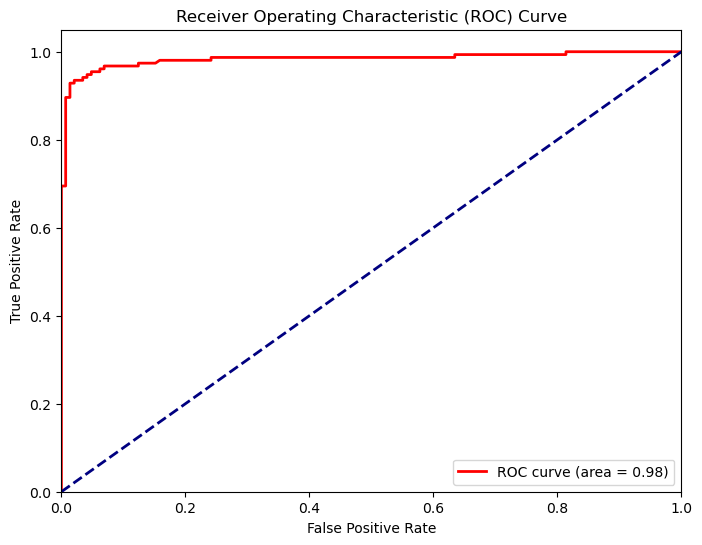

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted decision values
y_scores = perceptron_classifier.decision_function(X_test)

# Modify labels: 'Spam' as the positive class and 'Not Spam' as the negative class
y_test_binary = [1 if label == 'Spam' else 0 for label in y_test]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_binary, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [27]:
#Prediction of user input using Perceptron
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = perceptron_classifier.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Win an Iphone for free!! Claim it by clicking on this link now!
This msg is: Spam


# LDA Model

In [29]:
#Linear Disriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creating a Linear Discriminant Analysis (LDA) classifier
lda_classifier = LinearDiscriminantAnalysis()

# Converting the sparse training data to dense NumPy arrays
X_train_dense = X_train.to_numpy()
X_test_dense = X_test.to_numpy()

# Training the classifier on the balanced training data
lda_classifier.fit(X_train_dense, y_train)

# Making predictions on the test data
y_pred = lda_classifier.predict(X_test_dense)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Linear Discriminant Analysis (LDA) Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Linear Discriminant Analysis (LDA) Classifier Results:
Accuracy: 0.9096989966555183
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.85      0.99      0.91       145
        Spam       0.99      0.83      0.90       154

    accuracy                           0.91       299
   macro avg       0.92      0.91      0.91       299
weighted avg       0.92      0.91      0.91       299



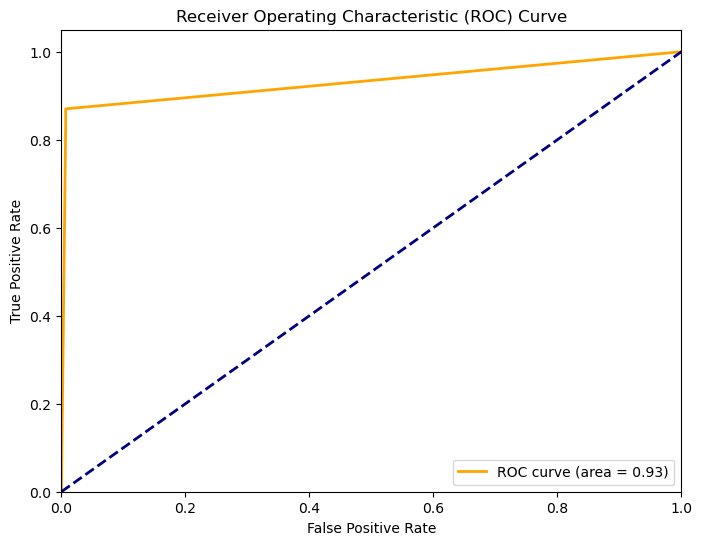

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted probabilities for the positive class ('Spam')
y_prob = lda_classifier.predict_proba(X_test_dense)[:, 1]

# Modify labels: 'Spam' as the positive class and 'Not Spam' as the negative class
y_test_binary = [1 if label == 'Spam' else 0 for label in y_test]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_binary, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [31]:
#Prediction of user input using LDA Classifer
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = lda_classifier.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Win an Iphone for free!! Claim it by clicking on this link now!
This msg is: Spam


# Hybrid Model

In [32]:
#Hybrid_model
from sklearn.ensemble import StackingClassifier
import joblib

# Create base classifiers: Random Forest and SVM
rf_classifier = RandomForestClassifier(n_estimators=100)
svm_classifier = SVC(kernel='linear')

# Create a stacked ensemble classifier
stacked_classifier = StackingClassifier(
    estimators=[('random_forest', rf_classifier), ('svm', svm_classifier)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacked ensemble classifier
stacked_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacked_classifier.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Hybrid Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Hybrid Classifier Results:
Accuracy: 0.959866220735786
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.94      0.98      0.96       145
        Spam       0.98      0.94      0.96       154

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



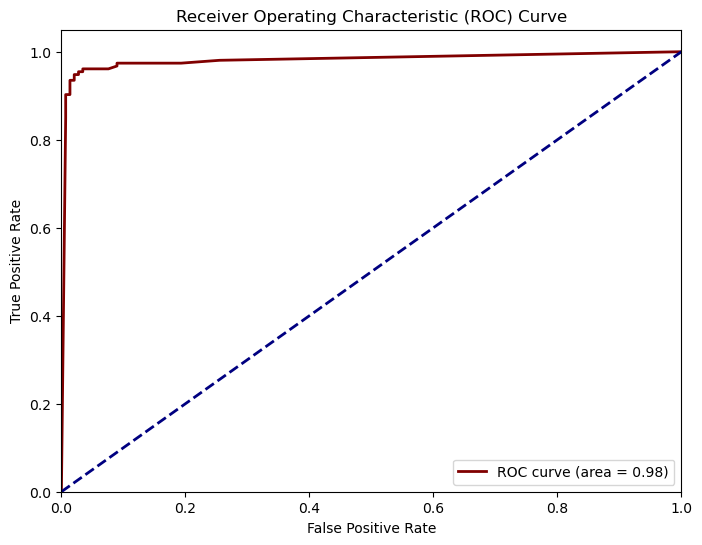

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted probabilities for the positive class ('Spam')
y_prob = stacked_classifier.predict_proba(X_test)[:, 1]

# Modify labels: 'Spam' as the positive class and 'Not Spam' as the negative class
y_test_binary = [1 if label == 'Spam' else 0 for label in y_test]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_binary, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='maroon', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [36]:
#Prediction of user input using Hybrid model
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = stacked_classifier.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
This msg is: Spam


# KNN Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("K-Nearest Neighbors Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

K-Nearest Neighbors Classifier Results:
Accuracy: 0.9297658862876255
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.89      0.97      0.93       145
        Spam       0.97      0.89      0.93       154

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



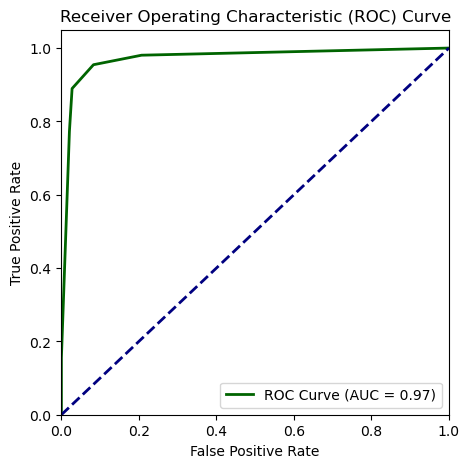

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (spam)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

# Map the categorical labels to numerical values
y_test_numeric = y_test.map({'Not Spam': 0, 'Spam': 1})

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_numeric, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
#Prediction of user input using KNN
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = knn_model.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
This msg is: Spam


# Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
# Create and train the Naive Bayes classifier (MultinomialNB)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Naive Bayes Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Naive Bayes Classifier Results:
Accuracy: 0.9698996655518395
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.96      0.98      0.97       145
        Spam       0.98      0.96      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



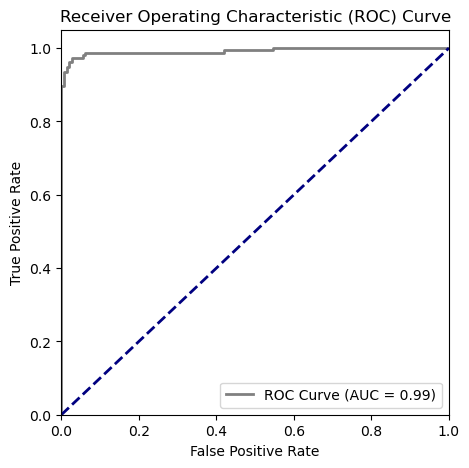

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and train the Naive Bayes classifier (MultinomialNB)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (spam)
y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Map the categorical labels to numerical values
y_test_numeric = y_test.map({'Not Spam': 0, 'Spam': 1})

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='grey', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
#Prediction of user input using Naive Bayes
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = nb_classifier.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
This msg is: Spam


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
x = decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = x.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

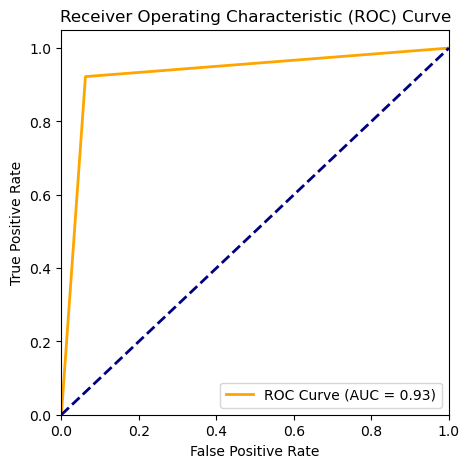

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and train the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (spam)
y_pred_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Map the categorical labels to numerical values
y_test_numeric = y_test.map({'Not Spam': 0, 'Spam': 1})

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [45]:
#Prediction of user input using Decision Tree
# Get user input
user_input = input("Enter the text to predict (e.g., an SMS message): ")

# Transform the user input using the same TF-IDF vectorizer used during training
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Convert the user input to a dense array
user_input_dense = user_input_tfidf.toarray()

# Use the pre-fitted SVM model to make predictions
prediction = decision_tree_model.predict(user_input_dense)
print("This msg is:",prediction[0])


Enter the text to predict (e.g., an SMS message): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
This msg is: Spam
